# Diaster Tweet

## Problem Statement:

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.



## Data Definition:

**Independent Variable**

1. id - a unique identifier for each tweet
2. text - the text of the tweet
3. location - the location the tweet was sent from (may be blank)
4. keyword - a particular keyword from the tweet (may be blank)

**Dependent Variable**

- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


<a id='toc'></a>
## **Tabel of Contents**

### Import packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import tensorflow as tf
import nltk
nltk.download('stopwords')
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

In [38]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Twitter/twitter_data.csv')

raw_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [39]:
print('There are {} rows and {} columns in dataset'.format(raw_data.shape[0],raw_data.shape[1]))

There are 7613 rows and 5 columns in dataset


### Class distribution

Text(0.5, 0, 'Target')

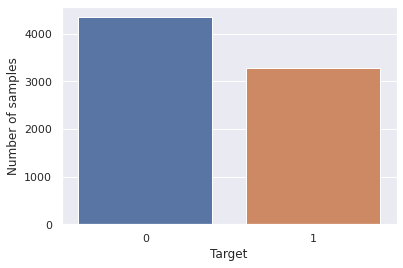

In [40]:
labels = raw_data.target.value_counts()

sns.barplot(x = labels.index, y = labels)
plt.gca().set_ylabel('Number of samples')
plt.gca().set_xlabel('Target')

*Note : There are more tweets with class 0 (No disaster) than class 1 (disaster tweets)*

### EDA (Exploratory Data Analysis)

1. Number of characters in tweets

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Number of charcters in tweets')

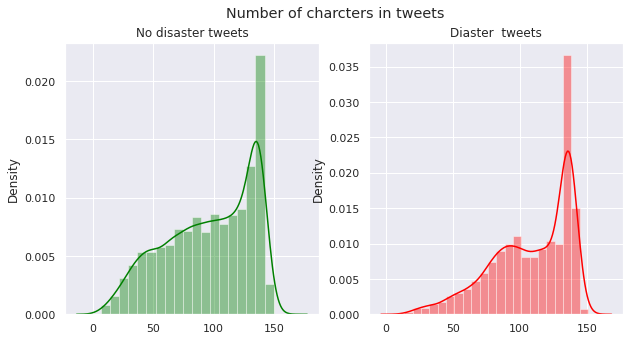

In [41]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))

no_char_0 = list(raw_data[raw_data['target'] == 0]['text'].map(len))
sns.distplot(no_char_0, ax = ax1, color = 'green')


no_char_1 = list(raw_data[raw_data['target'] == 1]['text'].map(len))
sns.distplot(no_char_1, ax = ax2, color = 'red')

ax1.set_title('No disaster tweets')
ax2.set_title('Diaster  tweets')

fig.suptitle('Number of charcters in tweets')
#plt.show()

**2. Number of words in tweet**

In [42]:
raw_data.iloc[15]

id                      23
keyword                NaN
location               NaN
text        What's up man?
target                   0
Name: 15, dtype: object

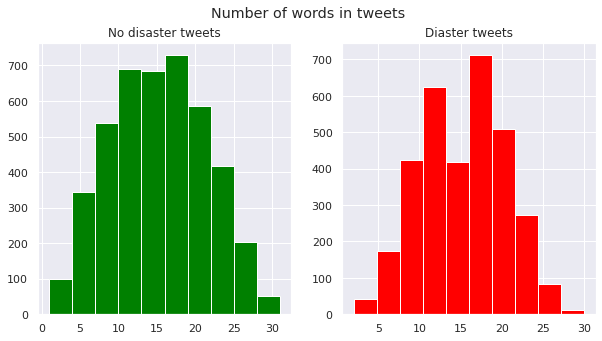

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

no_words_0 = raw_data[raw_data['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax1.hist(no_words_0, color = 'green')
ax1.set_title('No disaster tweets')

no_words_1 = raw_data[raw_data['target'] == 1]['text'].str.split().map(lambda x : len(x))
ax2.hist(no_words_1, color = 'red')
ax2.set_title('Diaster tweets')

plt.suptitle('Number of words in tweets')
plt.show()

3. Common stopwords in tweets

In [44]:
from collections import defaultdict

stop_words = set(nltk.corpus.stopwords.words('english'))

def get_common_words(raw_data,target,stop_words):
  list_of_words=[]
  
  
  
  for x in raw_data[raw_data['target']==target]['text'].str.split():
    for i in x:
      list_of_words.append(i)
  
  dic = defaultdict(int)
  
  for word in list_of_words:
      if word in stop_words:
          dic[word]+=1
          
  top_10 = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
 
  x,y=zip(*top_10)
  plt.bar(x,y)
  plt.title("List of common words")
  plt.show()
    

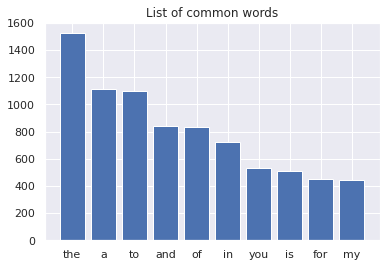

In [45]:
# Common words for No disaster tweets
get_common_words(raw_data,0,stop_words)

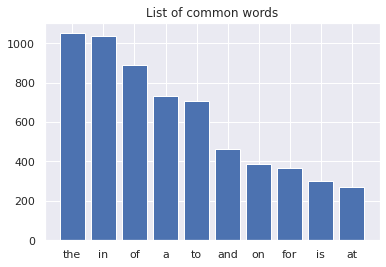

In [46]:
# Common words for Disaster tweets
get_common_words(raw_data,1,stop_words)

### Data Cleaning

In [47]:
data = raw_data.copy()

#### 1. Remove url's

In [48]:
def remove_url(text):
  url = re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

In [49]:
data['text'] = data['text'].map(remove_url)

#### 2. Remove html tags

In [50]:
def remove_html(text):
  html = re.compile(r'<.*?>')
  return html.sub(r"", text)


In [51]:
data['text'] = data['text'].map(remove_html)

#### 3. Remove emojis

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python/49146722#49146722

In [52]:
def remove_emoji(text):
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [53]:
data['text'] = data['text'].map(remove_emoji)

#### 4. Remove punctuations

In [54]:
import  string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [55]:
def remove_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [56]:
data['text'] = data['text'].map(remove_punct)

#### 5. Using GloVe for Vectorization

In [57]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop_words))]
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
corpus = create_corpus(data)

100%|██████████| 7613/7613 [00:01<00:00, 6955.77it/s]


You can download the below used file 'data_glove.6B.100d.txt' from : https://resources.oreilly.com/conferences/natural-language-processing-with-deep-learning/raw/master/data/glove.6B.100d.txt?inline=false

In [59]:
embedding_dict={}
with open('/content/drive/MyDrive/Colab Notebooks/Disaster Twitter/data_glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors

In [69]:
MAX_LEN=50
tokenizer_obj = tf.keras.preprocessing.text.Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

data_pad = tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [70]:
word_index = tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 16230


In [62]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 16230/16230 [00:00<00:00, 327799.92it/s]


In [64]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(num_words,100,embeddings_initializer= tf.keras.initializers.Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False))
model.add(tf.keras.layers.LSTM(64, dropout=0.1))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1623100   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,665,405
Trainable params: 42,305
Non-trainable params: 1,623,100
_________________________________________________________________


In [66]:
optimzer= tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [72]:
data_pad

array([[ 583, 4270,  751, ...,    0,    0,    0],
       [ 118,    7,  155, ...,    0,    0,    0],
       [ 114, 1600, 1480, ...,    0,    0,    0],
       ...,
       [ 278,  519, 1468, ...,    0,    0,    0],
       [  20, 1027, 2994, ...,    0,    0,    0],
       [   2,  136,   86, ...,    0,    0,    0]], dtype=int32)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data_pad,data.target.values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_val.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [74]:
history=model.fit(X_train, y_train, batch_size=4, epochs=20, validation_data = (X_val,y_val), verbose=2)

Epoch 1/20
1618/1618 - 36s - loss: 0.6864 - accuracy: 0.5741 - val_loss: 0.6361 - val_accuracy: 0.6611
Epoch 2/20
1618/1618 - 33s - loss: 0.5567 - accuracy: 0.7589 - val_loss: 0.5204 - val_accuracy: 0.7732
Epoch 3/20
1618/1618 - 32s - loss: 0.5137 - accuracy: 0.7767 - val_loss: 0.4998 - val_accuracy: 0.7706
Epoch 4/20
1618/1618 - 33s - loss: 0.4963 - accuracy: 0.7861 - val_loss: 0.4886 - val_accuracy: 0.7863
Epoch 5/20
1618/1618 - 33s - loss: 0.4830 - accuracy: 0.7928 - val_loss: 0.4811 - val_accuracy: 0.7881
Epoch 6/20
1618/1618 - 33s - loss: 0.4781 - accuracy: 0.7925 - val_loss: 0.4768 - val_accuracy: 0.7898
Epoch 7/20
1618/1618 - 33s - loss: 0.4708 - accuracy: 0.7977 - val_loss: 0.4709 - val_accuracy: 0.7916
Epoch 8/20
1618/1618 - 34s - loss: 0.4644 - accuracy: 0.8022 - val_loss: 0.4670 - val_accuracy: 0.7916
Epoch 9/20
1618/1618 - 33s - loss: 0.4635 - accuracy: 0.7986 - val_loss: 0.4648 - val_accuracy: 0.7960
Epoch 10/20
1618/1618 - 32s - loss: 0.4580 - accuracy: 0.8051 - val_loss:

In [75]:
def plot_results(history):
  training_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  plt.plot(training_accuracy, label = 'train_acc')
  plt.plot(validation_accuracy, label = 'val_acc')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

  training_loss = history.history['loss']
  validation_loss = history.history['val_loss']

  plt.plot(training_loss, label = 'train_loss')
  plt.plot(validation_loss, label = 'val_loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

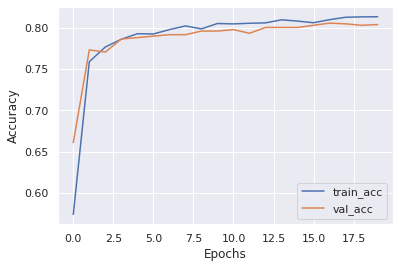

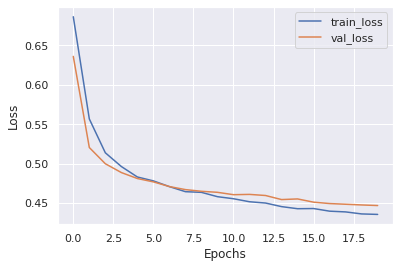

In [76]:
plot_results(history)

In [77]:
model_json = model.to_json()
with open("tweet.json", "w") as json_file:
  json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("tweet.h5")
print("Saved model to disk !!!")

Saved model to disk !!!


Saving Model Architecture

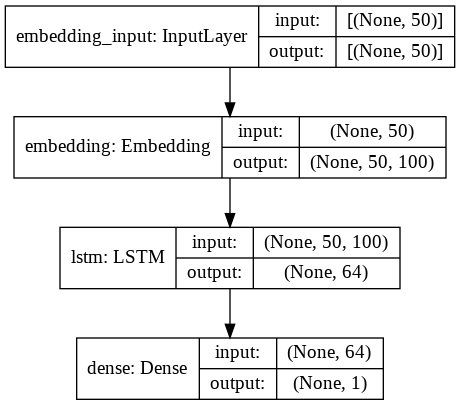

In [80]:
tf.keras.utils.plot_model(model, "Architecture.png", show_shapes=True)